<a href="https://colab.research.google.com/github/prof-atritiack/vision-opencv-basics/blob/main/001_OpenCV_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Visão Computacional com OpenCV

Este notebook reúne diferentes exemplos práticos usando **OpenCV**:

1. Fundamentos básicos de processamento de imagens.
2. Detecção de faces com HaarCascades.
3. Detecção de faces com HOG.
4. Detecção de faces com CNN.

⚠️ **Observações importantes**  
- Certifique-se de que os **arquivos de imagem** estejam corretamente carregados (caminho relativo ou absoluto).  
- Para os **modelos pré-treinados** (Haarcascade, HOG, CNN), é necessário ter os arquivos XML/pesos disponíveis no diretório correto.  



## 🔎 Observações sobre a Seção OpenCV Básico

- Sempre confira o **caminho das imagens** utilizadas (`cv2.imread`).
- Caso a imagem não seja carregada, `cv2.imread` retorna `None`. Verifique antes de aplicar filtros.  
- É recomendável trabalhar com imagens em uma pasta organizada, como `datasets/`, para manter reprodutibilidade.


##**Classificação de imagens com OpenCV**

**OpenCV** (Open Source Computer Vision Library), originalmente, desenvolvida pela Intel, em 2000, é uma biblioteca multiplataforma, totalmente livre ao uso acadêmico e comercial, para o desenvolvimento de aplicativos na área de Visão computacional.

Documentação:

https://opencv.org/

In [ ]:
# Importando a biblioteca OpenCV:
import cv2
# Importando o numpy (Numerical Python) para trabalhar com arrays
import numpy as np
# Importando o pacote pyplot do matplotlib
from matplotlib import pyplot as plt

In [ ]:
# Carregando a imagem de exemplo:
# O método .imread permite a importação e conversão de arquivos de imagem
image = cv2.imread('hearts.jpg')

In [ ]:
# Plotar a imagem (opção 1)
image

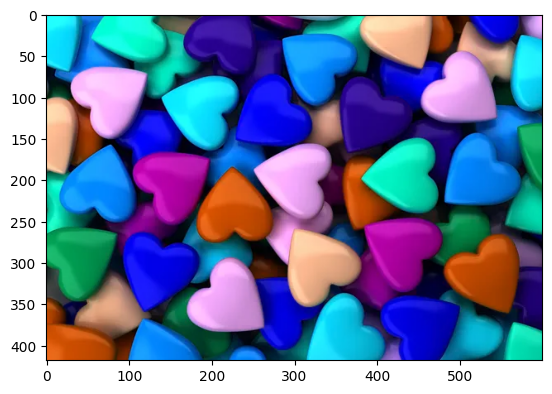

In [ ]:
# Plotar a imagem (opção 2)
plt.imshow(image)

Por padrão, o OpenCV usa a sequência BGR - Blue/Green/Red

array([[[255, 255,  35],
        [255, 255,  35],
        [255, 255,  35],
        ...,
        [253, 172, 240],
        [255, 175, 246],
        [255, 179, 248]],

       [[255, 255,  35],
        [255, 255,  35],
        [255, 255,  35],
        ...,
        [253, 172, 240],
        [255, 175, 246],
        [255, 179, 248]],

       [[255, 255,  35],
        [255, 255,  35],
        [255, 255,  35],
        ...,
        [253, 172, 240],
        [255, 175, 246],
        [255, 180, 249]],

       ...,

       [[ 25, 104, 235],
        [ 28, 107, 237],
        [ 26, 105, 236],
        ...,
        [161, 203,   0],
        [161, 203,   0],
        [161, 203,   0]],

       [[ 25, 104, 237],
        [ 26, 105, 238],
        [ 28, 106, 239],
        ...,
        [161, 203,   0],
        [161, 203,   0],
        [161, 203,   0]],

       [[ 25, 104, 237],
        [ 26, 105, 238],
        [ 28, 106, 239],
        ...,
        [161, 203,   0],
        [161, 203,   0],
        [161, 203,   0]]], dtype=uint8)
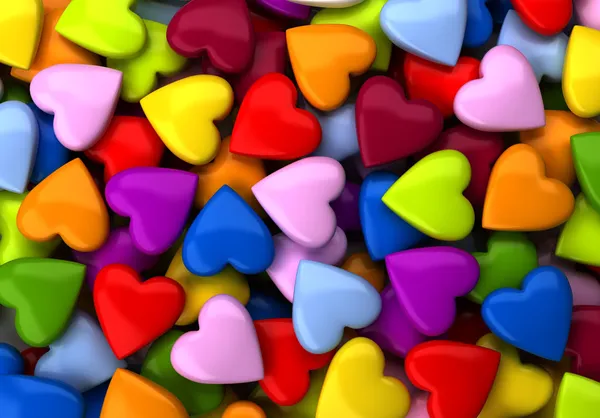

In [ ]:
# Invertendo canais BGR para RGB:
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imageRGB


## 🔎 Observações sobre HaarCascades

- Haarcascade é um **método clássico** de detecção de faces no OpenCV.  
- Necessário ter o arquivo `haarcascade_frontalface_default.xml` na pasta correta.  
- Este método é rápido, mas menos robusto que modelos baseados em deep learning.


Importante:

- A imagem colorida possui três dimensões: as linhas e as colunas da matriz, bem como os canais RGB da imagem.

- Uma imagem colorida possui três canais: R (Red - vermelho) G (Green - verde) B (Blue - azul).

In [ ]:
# Verifique as dimensões da imagem original
image.shape

(418, 600, 3)

In [ ]:
dimensoes = image.shape
linhas = image.shape[0]
colunas = image.shape[1]
canais_rgb = image.shape[2]

In [ ]:
print(f'Dimensões da imagem: {dimensoes}')
print(f'Qtde de linhas: {linhas}')
print(f'Qtde de colunas: {colunas}')
print(f'Número de camadas de cores (canais RGB): {canais_rgb}')

Dimensões da imagem: (418, 600, 3)
Qtde de linhas: 418
Qtde de colunas: 600
Número de camadas de cores (canais RGB): 3



Separando os canais de cores de um pixel específico.

In [ ]:
cores = image[100, 0]

In [ ]:
cores2 = imageRGB[100, 0]

In [ ]:
print(cores, cores2)

[10 46 19] [19 46 10]


In [ ]:
418 * 600 * 3

752400


## 🔎 Observações sobre HOG

- HOG (**Histogram of Oriented Gradients**) é eficiente para detectar faces em imagens de boa qualidade.  
- Sensível a variações de iluminação e pose.  
- Não requer GPU, roda totalmente em CPU.


**Imagem em tons de cinza**

Em muitos casos, para reduzir a dimensionalidade, convertemos as imagens para escala de cinza (GRAY SCALE)

In [ ]:
# Carregando a imagem na versão escala de cinza (grayscale) de um arquivo:
image_gray = cv2.imread('hearts.jpg', cv2.IMREAD_GRAYSCALE)

array([[230, 230, 230, ..., 204, 207, 210],
       [230, 230, 230, ..., 204, 207, 210],
       [230, 230, 230, ..., 204, 207, 210],
       ...,
       [ 95,  98,  96, ..., 167, 167, 167],
       [ 96,  97,  98, ..., 167, 167, 167],
       [ 96,  97,  98, ..., 167, 167, 167]], dtype=uint8)
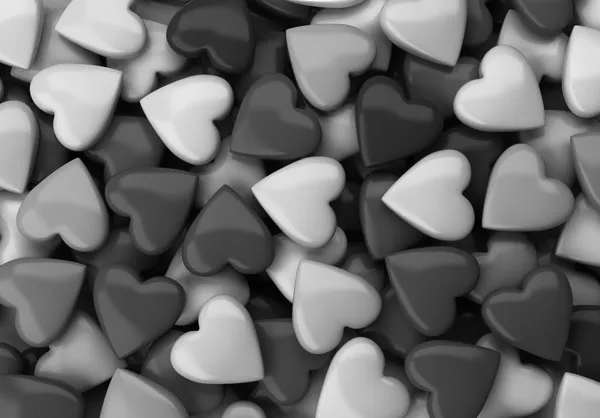

In [ ]:
image_gray

In [ ]:
image_gray.shape

(418, 600)

*Alterando o tamanho de uma imagem*

O redimensionamento da imagem pode ser feito na OpenCV através do comando:

cv2.resize ( imagem, tamanho, interpolação)

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/#gsc.tab=0

O tamanho é dado por uma tupla (W,H), onde W é a largura (número de colunas) e H é a altura (número de linhas)

Quanto mais pixels estiverem concentrados num espaço, maior vai ser a qualidade e nitidez dessa imagem.

Os softwares de edição de imagem criam ou reduzem pixels na imagem a partir dos pixels existentes.

O processo de “criação” chama-se interpolação.

Documentação sobre interpolação no Opencv:

https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

In [ ]:
imagem = cv2.imread("NATUREZA_1.png")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
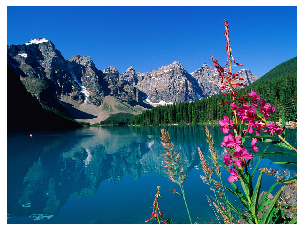

In [ ]:
imagem

In [ ]:
# imagem ----> 231 x 304
# Redimensionando a imagem para 600 x 400 pixels
# imagem2 = cv2.resize(imagem, (600, 400), interpolation = cv2.INTER_LINEAR)
imagem2 = cv2.resize(imagem, (600, 400))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
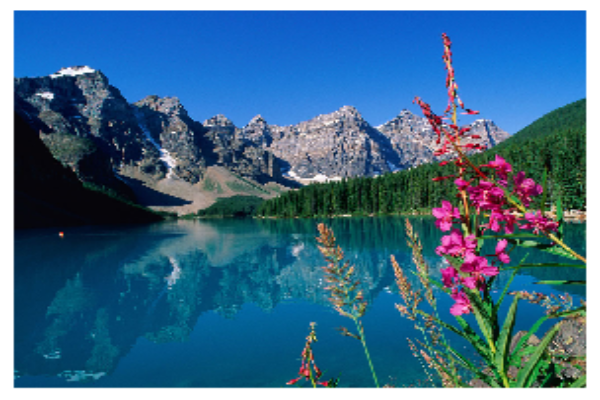

In [ ]:
imagem2


## 🔎 Observações sobre CNN

- CNNs oferecem maior precisão na detecção de rostos.  
- É necessário carregar os **modelos pré-treinados** corretamente (arquivos `.pb`, `.caffemodel`, etc.).  
- Verifique o caminho e se o arquivo realmente está disponível antes de rodar a célula.


## Exercício:

Para a imagem "img3x3_mini.png":

- Carregue e plote a imagem na tela.
- Converta a imagem em escala de cinza.
- Redimensione a imagem para um tamanho 10X maior. Plote a imagem.
- Repita o item anterior, agora testando e comparando as flags de interpolação relacionadas abaixo. Compare os resultados e comente.

INTER_LINEAR

INTER_CUBIC

INTER_NEAREST


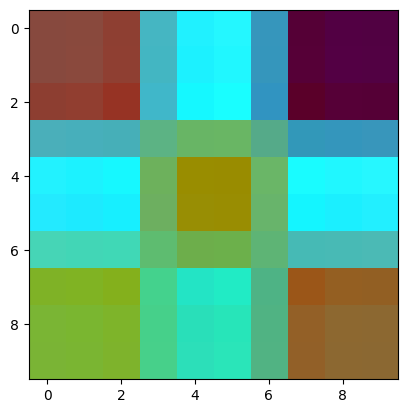

In [ ]:
# Carregue a imagem "img3x3_mini.png" (10 x 10 pixels):
img = cv2.imread('/content/img3x3_mini.png')
plt.imshow(img)

In [ ]:
# Converta a imagem em escala de cinza:
img_gray = cv2.imread('/content/img3x3_mini.png', cv2.IMREAD_GRAYSCALE)
# img_gray
plt.imshow(img_gray, cmap='gray')

# Redimensione a imagem para 100 x 100 pixels:

# imagem2 = cv2.resize(imagem, (100, 100), interpolation = cv2.INTER_LINEAR)

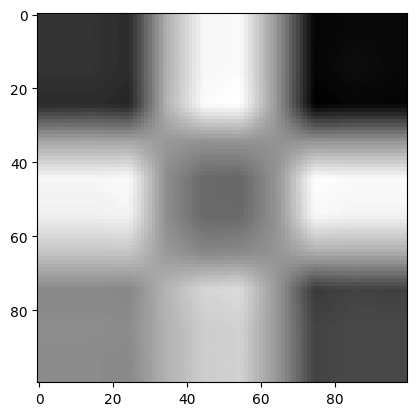

In [ ]:
# Escreva aqui a sua solução, usando a flag INTER_LINEAR:
imgLIN = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_LINEAR)
plt.imshow(imgLIN, cmap='gray')

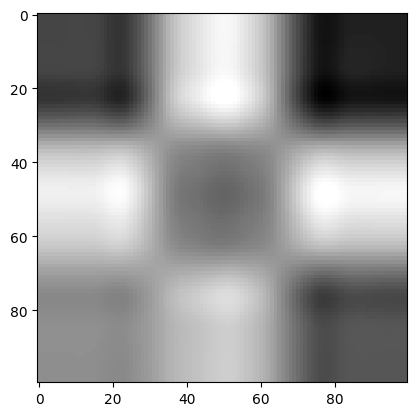

In [ ]:
# Escreva aqui a sua solução, usando a flag INTER_CUBIC:
imgCUB = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_CUBIC)
plt.imshow(imgCUB, cmap='gray')

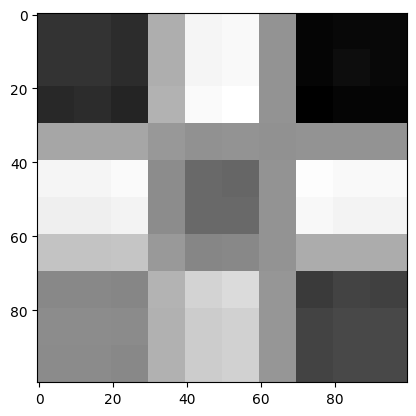

In [ ]:
# Escreva aqui a sua solução, usando a flag INTER_NEAREST:
imgNEA = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_NEAREST)
plt.imshow(imgNEA, cmap='gray')

## Detectando faces com o OpenCV e o algoritmo Haar Cascades

https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/

https://github.com/opencv/opencv/tree/master/data/haarcascades

In [ ]:
# Importando o Opencv
import cv2
# Importando o pacote imshow do Opencv para o Google Colab
from google.colab.patches import cv2_imshow

In [ ]:
# Importar a imagem de exemplo
imagem = cv2.imread('/content/people1.jpg')

In [ ]:
# Verificar as dimensões da imagem
imagem.shape

In [ ]:
# Visualizando a imagem direto pelo Opencv
cv2_imshow(imagem)

In [ ]:
# Redimensionando a imagem (opcional)
# imagem = cv2.resize(imagem, (800, 600))
# imagem.shape

In [ ]:
# Convertendo em escala de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [ ]:
# Verificando novamente as dimensões:
imagem_cinza.shape

In [ ]:
# Importando o modelo pré-treinado do classificador Haarcascade
detector_facial = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
# Executando a função de detecção de faces
deteccoes = detector_facial.detectMultiScale(imagem_cinza)

In [ ]:
# As duas primeiras colunas referem-se às coordenadas de início e fim da face encontrada.
# As duas últimas referem-se ao tamanho da face encontrada.
deteccoes

In [ ]:
# Verificando a quantidade de detecções
len(deteccoes)

In [ ]:
# Percorrendo as coordenadas da variável "deteccoes":
# Sendo:
# x: coordenada no eixo x do canto superior esquerdo
# y: coordenada no eixo y do canto superior esquerdo
# w: largura
# h: altura
for x, y, w, h in deteccoes:
  print(x, y, w, h)

In [ ]:
# Criando um retângulo com cv2.rectangle
# cv2.rectangle(imagem, coordenada inicial, coordenada final,
# RGB da cor, espessura do traço)
for x, y, w, h in deteccoes:
  #print(x, y, w, h)
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0,255,0), 3)
cv2_imshow(imagem)

#### Ajustando o parâmetro Scale Factor.

https://learnopencv.com/image-resizing-with-opencv/#resize-with-scaling-factor



Impacto do Scale Factor na detecção:

Valores maiores que 1 (ex: 1.3): A imagem é reduzida mais rapidamente em cada passo. Isso acelera a detecção, mas pode levar a perda de faces pequenas ou em ângulos desafiadores. Útil para imagens com muitas faces ou quando a velocidade é prioridade.

Valores próximos a 1 (ex: 1.1): A redução da imagem é mais gradual. Isso aumenta a chance de detectar faces menores ou em poses variadas, mas torna a detecção mais lenta. Ideal para imagens com poucas faces ou quando a precisão é fundamental.

In [ ]:
# Valor mínimo do parâmetro scale factor: 1.01
# Valor default do scale factor: 1.10
imagem = cv2.imread('/content/people1.jpg')
# imagem = cv2.resize(imagem, (800, 600))
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.1)
for (x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0,255,0), 3)
cv2_imshow(imagem)

In [ ]:
# Ajustando outros parâmetros:
# minNeighbors: mínimo de vizinhos detectados considerados faces.
# minSize: tamanho mínimo da face.
# maxSize: tamanho máximo da face.

In [ ]:
imagem = cv2.imread('/content/people2.jpg')
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.08, minNeighbors=3, minSize=(43,43), maxSize=(100,100))
for (x, y, w, h) in deteccoes:
  print(w, h)
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(imagem)

In [ ]:
deteccoes

#### Histogram Of Oriented Gradients (HOG)
https://learnopencv.com/histogram-of-oriented-gradients/

In [ ]:
# Importando as bibliotecas OpenCV, DLib e im_show
import cv2
import dlib
from google.colab.patches import cv2_imshow

In [ ]:
# Insira aqui o seu arquivo
imagem = cv2.imread('people2.jpg')

In [ ]:
detector_face_hog = dlib.get_frontal_face_detector()

In [ ]:
deteccoes = detector_face_hog(imagem, 2) # O segundo parâmetro é semelhante ao Scale Factor do Opencv (Haarcascades)

In [ ]:
deteccoes

In [ ]:
len(deteccoes)

In [ ]:
for face in deteccoes:
  print(face.left())
  print(face.top())
  print(face.right())
  print(face.bottom())

In [ ]:
for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 0), 1)
cv2_imshow(imagem)

In [ ]:
imagem = cv2.imread('people2.jpg')
detector_face_hog = dlib.get_frontal_face_detector()
deteccoes = detector_face_hog(imagem, 2)
for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 0), 1)
cv2_imshow(imagem)

In [ ]:
# Importando as bibliotecas OpenCV, DLib e im_show
import cv2
import dlib
from google.colab.patches import cv2_imshow

In [ ]:
imagem = cv2.imread('people2.jpg')

In [ ]:
detector_face_cnn = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')

In [ ]:
deteccoes = detector_face_cnn(imagem, 1)
for face in deteccoes:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(l,t,r,b,c)
  cv2.rectangle(imagem,(l,t), (r,b), (255, 255, 0), 1)
cv2_imshow(imagem)


## ⚡ Observação Importante para Google Colab

Se estiver executando este notebook no **Google Colab**, habilite a GPU para acelerar a inferência dos modelos baseados em CNN.

- Vá em: **Ambiente de execução > Alterar tipo de ambiente de execução > Acelerador de hardware > GPU**  
- Isso garantirá melhor desempenho e menor tempo de execução.
